<a href="https://colab.research.google.com/github/alyssa-raphaella/COMP8240/blob/master/comp8240_practical_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practical Week 8: Working with Tweets of Donald Trump

In [1]:
import tweepy

**Task1**: Authentication

In [2]:
# Your credentials go here ...

consumer_key = 'CfqZfNRTvcHdDRCo23PZt3ETa'
consumer_key_secret = '9NVfiSz9tcp2GvLDchPxfh2sNLHKpmUVwfvuxeCPwdjKM14upU'
access_token = '1223923047490445312-gNkYAcwaS1HDVmQfi7KF0YJQBpokZW'
access_token_secret = 'ZZ5iad8aXQCrvI9NnAzqZxYBTdKHb81WubYeLeAiQ3T8i'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [3]:
api.update_status("Tweepy Test xxxx ugh")

Status(_api=<tweepy.api.API object at 0x7f1c78cd8828>, _json={'created_at': 'Wed Sep 30 05:54:34 +0000 2020', 'id': 1311182631485288448, 'id_str': '1311182631485288448', 'text': 'Tweepy Test xxxx ugh', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://github.com/alyssa-raphaella/Twitter" rel="nofollow">COMP8230_TwitterTest001</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1223923047490445312, 'id_str': '1223923047490445312', 'name': 'Alyssa', 'screen_name': '14rg3', 'location': 'Republic of the Philippines', 'description': 'voice inside my head', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 16, 'listed_count': 0, 'created_at': 'Sun Feb 02 10:56:17 +0000 2020', 'favourites_count': 6, 'utc_offset': None, 'time_z

In [4]:
max_tweets = 150
screen_name = 'realDonaldTrump'

tweets = api.user_timeline(screen_name = screen_name,
                           tweet_mode = 'extended',
                           count = max_tweets)

In [5]:
import json

list_of_dicts = []
for json_tweet in tweets:
    list_of_dicts.append(json_tweet._json)

with open('trump-150-tweets.txt', mode = 'w') as file:
        file.write(json.dumps(list_of_dicts, indent = 4))

**Task 1**: Read the file 'trump-150-tweets.txt' that consists of a list of tweets in the form of JSON objects (dictionaries) 
    into a new list of simpler dictionaries. Each of these simpler dictionaries should contain only the following keys:  'text', 'favorite_count', 'retweet_count' and 'created_at' as shown below.

In [6]:
new_list = []

with open('trump-150-tweets.txt', mode = 'r', encoding = 'utf-8') as file:
  list_of_dicts = json.load(file)

tweet_list = []
for tweet in list_of_dicts:
  list_per_tweet = []
  text = tweet["full_text"]
  fav_count = tweet["favorite_count"]
  rt_count = tweet["retweet_count"]
  created_at = tweet["created_at"]
  list_per_tweet.extend((text, fav_count, rt_count, created_at))
  tweet_list.append(list_per_tweet)

In [7]:
print(tweet_list[1])

['RT @GaryCoby: “Joe Biden will smile in your face and stab you in the back...\n\nDeceiving and lying to the American people.”\n\nAmerica wants a…', 0, 1642, 'Wed Sep 30 05:16:28 +0000 2020']


**Task 2**: Read the list with the simplified tweets into a pandas DataFrame and display the DataFrame.

In [8]:
import pandas as pd

tweet_df = pd.DataFrame(tweet_list, columns = ["Text", "Favorite Count", "Retweet Count", "Created At"] )
tweet_df.head(5)

,Text,Favorite Count,Retweet Count,Created At
0,"RT @DarrellIssa: Tonight, Joe Biden made it cl...",0,2707,Wed Sep 30 05:17:24 +0000 2020
1,RT @GaryCoby: “Joe Biden will smile in your fa...,0,1642,Wed Sep 30 05:16:28 +0000 2020
2,RT @TimRunsHisMouth: If you still can't figure...,0,3309,Wed Sep 30 05:12:43 +0000 2020
3,RT @KLF: BIDEN tonight: “The Green New Deal is...,0,3365,Wed Sep 30 05:11:33 +0000 2020
4,RT @RealSaavedra: Biden has repeatedly failed ...,0,2471,Wed Sep 30 05:11:02 +0000 2020


**Task 3**: Generate a list 'text_list' that contains the texts of each tweet and print this list as shown below.

In [9]:
text_list = tweet_df["Text"].tolist()
text_list

['RT @DarrellIssa: Tonight, Joe Biden made it clear that if he’s elected he’s prepared to perpetually lockdown the American people, shut the…',
 'RT @GaryCoby: “Joe Biden will smile in your face and stab you in the back...\n\nDeceiving and lying to the American people.”\n\nAmerica wants a…',
 "RT @TimRunsHisMouth: If you still can't figure out why the American public doesn't trust the media... just rewatch Chris Wallace's performa…",
 'RT @KLF: BIDEN tonight: “The Green New Deal is not my plan.” \n\nBIDEN website: “Biden believes the Green New Deal is a crucial framework…”…',
 'RT @RealSaavedra: Biden has repeatedly failed to answer legitimate questions that American voters should know the answers to before voting…',
 'RT @BrandonStraka: @realDonaldTrump You cleaned his clock. Full stop. \nThe American ppl give a damn about 2 things right now: leftist viole…',
 'RT @philipttirino: The American people didn’t elect @realDonaldTrump to play nice guy.',
 "RT @abigailmarone: It's literal in

**Task 4**: Calculate the length of the text of each tweet and add a new column 'length' to the DataFrame.

In [10]:
len_list = []
for tweet in text_list:
  len_list.append(len(tweet.split()))

tweet_df["Length"] = len_list
tweet_df.head(5)

,Text,Favorite Count,Retweet Count,Created At,Length
0,"RT @DarrellIssa: Tonight, Joe Biden made it cl...",0,2707,Wed Sep 30 05:17:24 +0000 2020,22
1,RT @GaryCoby: “Joe Biden will smile in your fa...,0,1642,Wed Sep 30 05:16:28 +0000 2020,25
2,RT @TimRunsHisMouth: If you still can't figure...,0,3309,Wed Sep 30 05:12:43 +0000 2020,21
3,RT @KLF: BIDEN tonight: “The Green New Deal is...,0,3365,Wed Sep 30 05:11:33 +0000 2020,24
4,RT @RealSaavedra: Biden has repeatedly failed ...,0,2471,Wed Sep 30 05:11:02 +0000 2020,20


**Task 5**: Plot the frequencies of the tweet lengths using a bar plot as illustrated below.

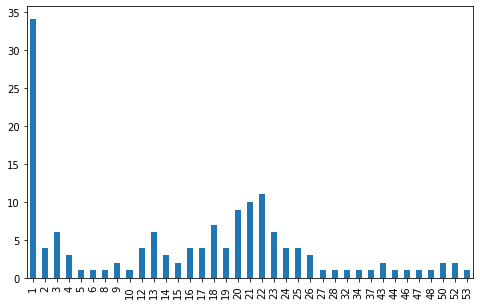

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))
tweet_df["Length"].value_counts().sort_index().plot.bar()

**Task 6**: Use the information in the column 'created_at' and add a column 'hour' to the DataFrame as illustrated below.

In [12]:
tweet_df["Created At"] = pd.to_datetime(tweet_df["Created At"])
hour_list = []

for h in tweet_df["Created At"]:
  hour_list.append(h.hour)

tweet_df["Hour"] = hour_list
tweet_df.head(8)

,Text,Favorite Count,Retweet Count,Created At,Length,Hour
0,"RT @DarrellIssa: Tonight, Joe Biden made it cl...",0,2707,2020-09-30 05:17:24+00:00,22,5
1,RT @GaryCoby: “Joe Biden will smile in your fa...,0,1642,2020-09-30 05:16:28+00:00,25,5
2,RT @TimRunsHisMouth: If you still can't figure...,0,3309,2020-09-30 05:12:43+00:00,21,5
3,RT @KLF: BIDEN tonight: “The Green New Deal is...,0,3365,2020-09-30 05:11:33+00:00,24,5
4,RT @RealSaavedra: Biden has repeatedly failed ...,0,2471,2020-09-30 05:11:02+00:00,20,5
5,RT @BrandonStraka: @realDonaldTrump You cleane...,0,2994,2020-09-30 05:08:38+00:00,22,5
6,RT @philipttirino: The American people didn’t ...,0,3445,2020-09-30 05:02:54+00:00,12,5
7,RT @abigailmarone: It's literal insanity watch...,0,2118,2020-09-30 05:02:36+00:00,21,5


**Task 7**: Use a bar plot and plot the frequencies of the times at which tweets were sent (at hourly intervals).

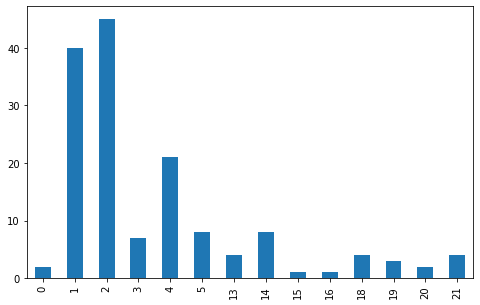

In [13]:
plt.figure(figsize = (8, 5))
tweet_df["Hour"].value_counts().sort_index().plot.bar()

**Task 8**: Use a regular expression that finds the hashtags in the tweets ('text'), add them to a new column 'hashtag' and display the resulting DataFrame. 

In [14]:
import re

hash_list = []
for tweet in text_list:
  hash_list.append(re.findall(r'#(\w+)', tweet))

tweet_df["Hashtags"] = hash_list
tweet_df

,Text,Favorite Count,Retweet Count,Created At,Length,Hour,Hashtags
0,"RT @DarrellIssa: Tonight, Joe Biden made it cl...",0,2707,2020-09-30 05:17:24+00:00,22,5,[]
1,RT @GaryCoby: “Joe Biden will smile in your fa...,0,1642,2020-09-30 05:16:28+00:00,25,5,[]
2,RT @TimRunsHisMouth: If you still can't figure...,0,3309,2020-09-30 05:12:43+00:00,21,5,[]
3,RT @KLF: BIDEN tonight: “The Green New Deal is...,0,3365,2020-09-30 05:11:33+00:00,24,5,[]
4,RT @RealSaavedra: Biden has repeatedly failed ...,0,2471,2020-09-30 05:11:02+00:00,20,5,[]
...,...,...,...,...,...,...,...
145,For years you had a President who apologized f...,114586,28271,2020-09-27 01:26:24+00:00,52,1,[]
146,"Together, we are taking back our Country. We a...",49225,13489,2020-09-27 01:23:23+00:00,52,1,[]
147,"In just 3 and a half years, we have secured Am...",71294,16653,2020-09-27 01:12:59+00:00,43,1,[MAGA]
148,THANK YOU PENNSYLVANIA!\nhttps://t.co/uQwRIKTPFN,57731,12810,2020-09-27 01:07:31+00:00,4,1,[]


**Task 9**: Use a regular expression that removes all links from the tweets ('text'), add a column 'text_without_links' and display the resulting DataFrame.

In [15]:
raw_text_list = []

for tweet in text_list:
  raw_text_list.append(re.sub(r'https?:\/\/.*[\r\n]*', '', tweet, flags = re.MULTILINE))

tweet_df["without URL"] = raw_text_list
tweet_df

,Text,Favorite Count,Retweet Count,Created At,Length,Hour,Hashtags,without URL
0,"RT @DarrellIssa: Tonight, Joe Biden made it cl...",0,2707,2020-09-30 05:17:24+00:00,22,5,[],"RT @DarrellIssa: Tonight, Joe Biden made it cl..."
1,RT @GaryCoby: “Joe Biden will smile in your fa...,0,1642,2020-09-30 05:16:28+00:00,25,5,[],RT @GaryCoby: “Joe Biden will smile in your fa...
2,RT @TimRunsHisMouth: If you still can't figure...,0,3309,2020-09-30 05:12:43+00:00,21,5,[],RT @TimRunsHisMouth: If you still can't figure...
3,RT @KLF: BIDEN tonight: “The Green New Deal is...,0,3365,2020-09-30 05:11:33+00:00,24,5,[],RT @KLF: BIDEN tonight: “The Green New Deal is...
4,RT @RealSaavedra: Biden has repeatedly failed ...,0,2471,2020-09-30 05:11:02+00:00,20,5,[],RT @RealSaavedra: Biden has repeatedly failed ...
...,...,...,...,...,...,...,...,...
145,For years you had a President who apologized f...,114586,28271,2020-09-27 01:26:24+00:00,52,1,[],For years you had a President who apologized f...
146,"Together, we are taking back our Country. We a...",49225,13489,2020-09-27 01:23:23+00:00,52,1,[],"Together, we are taking back our Country. We a..."
147,"In just 3 and a half years, we have secured Am...",71294,16653,2020-09-27 01:12:59+00:00,43,1,[MAGA],"In just 3 and a half years, we have secured Am..."
148,THANK YOU PENNSYLVANIA!\nhttps://t.co/uQwRIKTPFN,57731,12810,2020-09-27 01:07:31+00:00,4,1,[],THANK YOU PENNSYLVANIA!\n


**Task 10**: Remove all retweets ('RT') from the DataFrame and display the resulting DataFrame.

In [16]:
og_tweet_df = tweet_df[~tweet_df.Text.str.contains("RT")]
og_tweet_df

,Text,Favorite Count,Retweet Count,Created At,Length,Hour,Hashtags,without URL
12,https://t.co/HUSFkHqsyC,130147,33916,2020-09-30 03:57:50+00:00,1,3,[],
15,https://t.co/58ssX7EfUj,43076,13801,2020-09-30 02:35:11+00:00,1,2,[],
16,Volunteer to be a Trump Election Poll Watcher....,32770,10171,2020-09-30 02:30:39+00:00,13,2,[MakeAmericaGreatAgain],Volunteer to be a Trump Election Poll Watcher....
17,https://t.co/gsFSgh2KPc,28488,7365,2020-09-30 02:27:50+00:00,1,2,[],
18,“EPA: One Trillion Trees Initiative will build...,24403,7289,2020-09-30 02:26:18+00:00,13,2,[],“EPA: One Trillion Trees Initiative will build...
...,...,...,...,...,...,...,...,...
145,For years you had a President who apologized f...,114586,28271,2020-09-27 01:26:24+00:00,52,1,[],For years you had a President who apologized f...
146,"Together, we are taking back our Country. We a...",49225,13489,2020-09-27 01:23:23+00:00,52,1,[],"Together, we are taking back our Country. We a..."
147,"In just 3 and a half years, we have secured Am...",71294,16653,2020-09-27 01:12:59+00:00,43,1,[MAGA],"In just 3 and a half years, we have secured Am..."
148,THANK YOU PENNSYLVANIA!\nhttps://t.co/uQwRIKTPFN,57731,12810,2020-09-27 01:07:31+00:00,4,1,[],THANK YOU PENNSYLVANIA!\n
